In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("C:\\Users\\Dell\\Desktop\\Data Science\\Data Science Assignment\\Assignment 15\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Pairplot

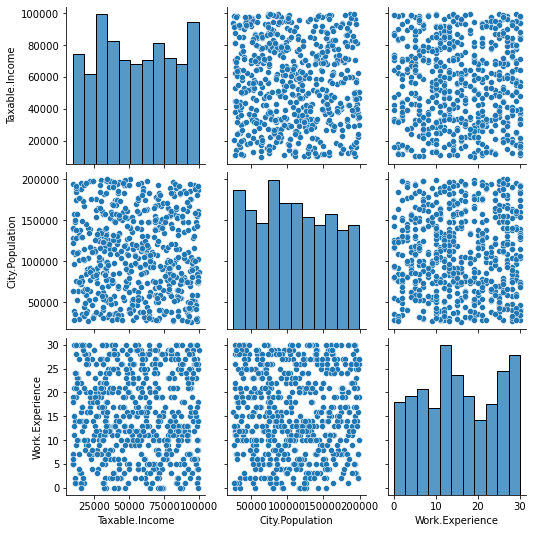

In [12]:
sns.pairplot(data)

Boxplot

<AxesSubplot:xlabel='Work.Experience'>

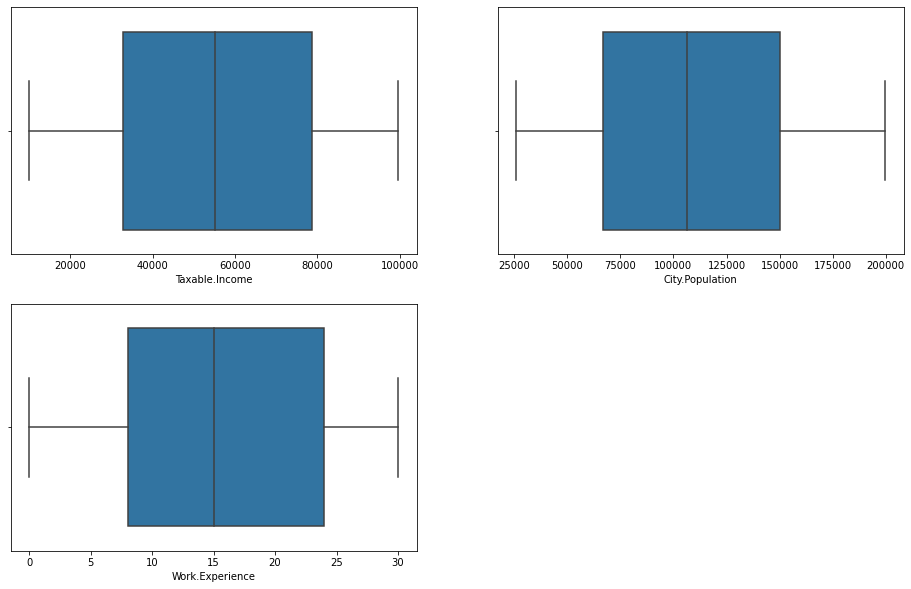

In [13]:
# Making boxplot
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
sns.boxplot(x=data["Taxable.Income"])

plt.subplot(2,2,2)
sns.boxplot(x=data["City.Population"])

plt.subplot(2,2,3)
sns.boxplot(x=data["Work.Experience"])

Barplot

Text(0.5, 1.0, 'Urban')

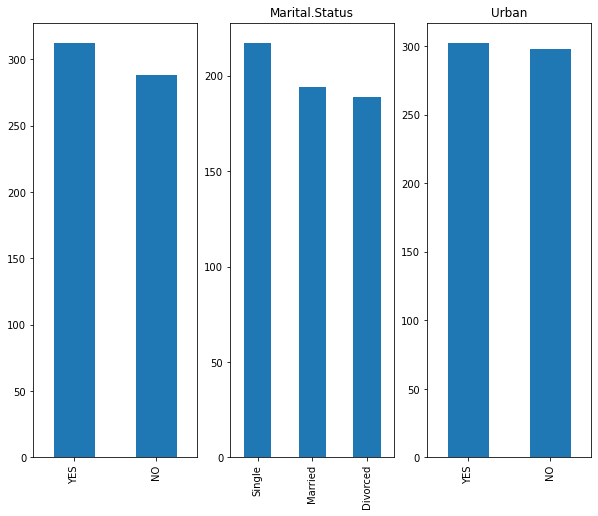

In [14]:
plt.subplots(figsize=(10,8))

plt.subplot(1,3,1)
data["Undergrad"].value_counts().plot.bar()

plt.subplot(1,3,2)
data['Marital.Status'].value_counts().plot.bar()
plt.title("Marital.Status")

plt.subplot(1,3,3)
data['Urban'].value_counts().plot.bar()
plt.title("Urban")

Histogram

Text(0.5, 1.0, 'Work.Experience')

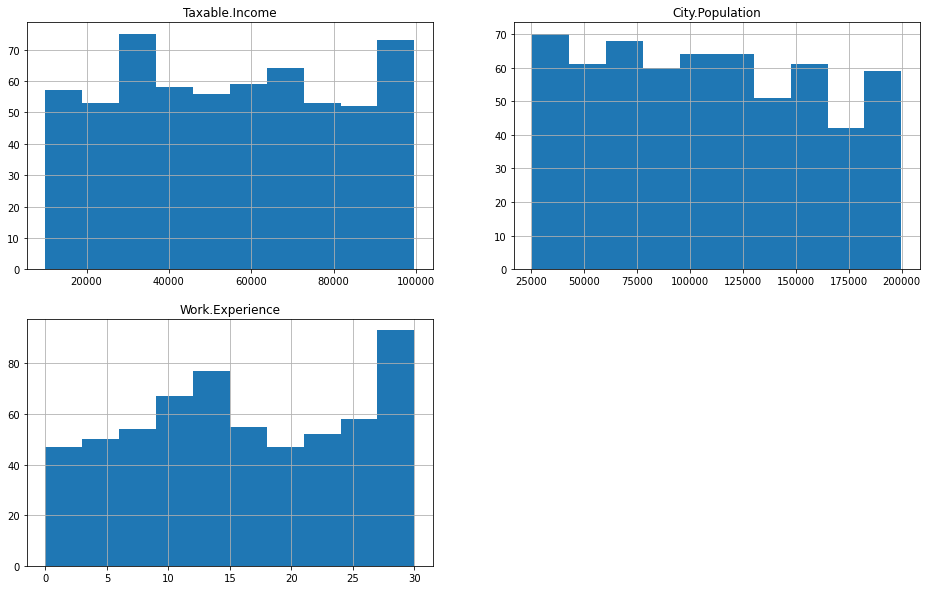

In [15]:
plt.subplots(figsize=(16, 10))

plt.subplot(2,2,1)
data['Taxable.Income'].hist()
plt.title("Taxable.Income")

plt.subplot(2,2,2)
data['City.Population'].hist()
plt.title("City.Population")

plt.subplot(2,2,3)
data['Work.Experience'].hist()
plt.title("Work.Experience")

Boxplot and Histogram both in one

([<AxesSubplot:title={'center':'Taxable.Income'}>,
  <AxesSubplot:title={'center':'Taxable.Income'}>,
  Text(0.5, 1.0, 'Taxable.Income')],
 [<AxesSubplot:xlabel='Taxable.Income'>,
  <AxesSubplot:xlabel='Taxable.Income'>])

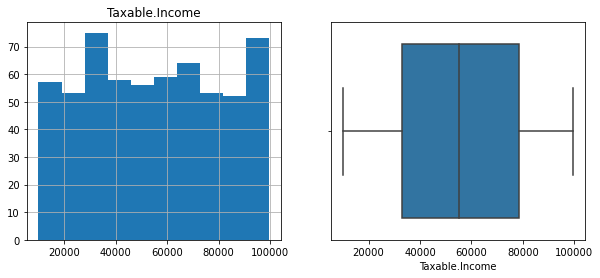

In [16]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Taxable.Income'].hist(),plt.title("Taxable.Income")],[plt.subplot(1,2,2),sns.boxplot(x=data["Taxable.Income"])]

([<AxesSubplot:title={'center':'City.Population'}>,
  <AxesSubplot:title={'center':'City.Population'}>,
  Text(0.5, 1.0, 'City.Population')],
 [<AxesSubplot:xlabel='City.Population'>,
  <AxesSubplot:xlabel='City.Population'>])

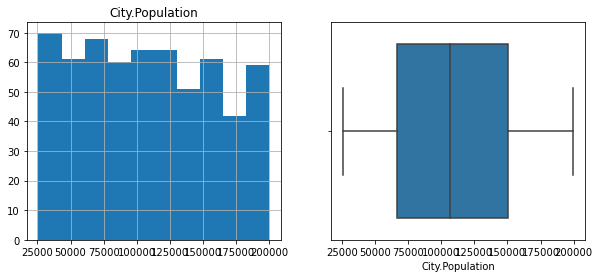

In [17]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['City.Population'].hist(),plt.title("City.Population")],[plt.subplot(1,2,2),sns.boxplot(x=data["City.Population"])]

([<AxesSubplot:title={'center':'Work.Experience'}>,
  <AxesSubplot:title={'center':'Work.Experience'}>,
  Text(0.5, 1.0, 'Work.Experience')],
 [<AxesSubplot:xlabel='Work.Experience'>,
  <AxesSubplot:xlabel='Work.Experience'>])

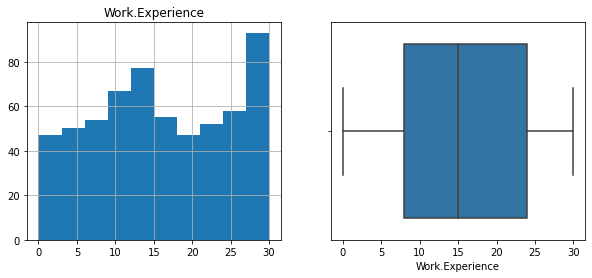

In [18]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Work.Experience'].hist(),plt.title("Work.Experience")],[plt.subplot(1,2,2),sns.boxplot(x=data["Work.Experience"])]

In [21]:
print('Maximum income in data set', data['Taxable.Income'].max())
print('Mimimum income in data set', data['Taxable.Income'].min())

Maximum income in data set 99619
Mimimum income in data set 10003


In [22]:
# adding one "Target " column in dataset
# in bins { bins = [10000= minimum data , 30000=condition , 99620=maximum data ]}
data["Target"] = pd.cut(data["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [23]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [24]:
data["Target"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [62]:
from sklearn import preprocessing

In [63]:
lbl_enco=preprocessing.LabelEncoder()

In [64]:

data["Marital.Status"]=lbl_enco.fit_transform(data["Marital.Status"])

In [65]:
data["Undergrad"]=lbl_enco.fit_transform(data["Undergrad"])

In [66]:
data["Urban"]=lbl_enco.fit_transform(data["Urban"])

In [67]:
data['Target']= lbl_enco.fit_transform(data['Target'])

In [68]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target,CreditRange
0,0,2,68833,50047,10,1,0,0
1,1,0,33700,134075,18,1,0,0
2,0,1,36925,160205,30,1,0,0
3,1,2,50190,193264,15,1,0,0
4,0,1,81002,27533,28,0,0,0
...,...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0,0
596,1,0,69967,55369,2,1,0,0
597,0,0,47334,154058,0,1,0,0
598,1,1,98592,180083,17,0,0,0


In [69]:
x=data.iloc[:,0:8]
y=data["Target"]

In [70]:
seed=8

kfold=KFold(n_splits=8,random_state=seed,shuffle=True)

In [71]:
kfold

KFold(n_splits=8, random_state=8, shuffle=True)

In [72]:
cart=DecisionTreeClassifier()

In [73]:
num_trees=50
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)

In [74]:
result_forest = cross_val_score(model, x, y, cv = kfold)
print(result_forest.mean())

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-package

1.0


In [75]:
# AdaBoost Classification

num_trees = 10
seed=7
model_adaboost = AdaBoostClassifier(n_estimators = num_trees,
                           random_state = seed)

In [76]:
result_adaboost = cross_val_score(model_adaboost, x, y, cv = kfold)
print(result_adaboost.mean())

0.9983333333333333


In [77]:
# Stacking Ensemble for Classification

# create the sub models
estimators = []

model1_reg = LogisticRegression(max_iter=300)
estimators.append(('logistic', model1_reg))

In [78]:
model2_reg = DecisionTreeClassifier()
estimators.append(('cart', model2_reg))

In [79]:
model3_reg = SVC()
estimators.append(('svm', model3_reg))

In [80]:
# create the ensemble model

ensemble = VotingClassifier(estimators)

In [81]:
estimators

[('logistic', LogisticRegression(max_iter=300)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [82]:
results_final = cross_val_score(ensemble, x, y, cv = kfold)
print(results_final.mean())

0.9883333333333333
